# Resistivity Lab Assignment 
                        - gautam

## Raw Data Table

In [13]:
from IPython.display import display
import matplotlib.pyplot as plt
import pylab as plt
import pandas as pd
import math

f = open('resistivity-data.csv', 'r')
data = pd.read_csv(f)
display(data)


,L(m),V(V),I(A)
0,0.1,0.48,1.11
1,0.2,0.84,1.11
2,0.3,1.20,1.11
3,0.4,1.57,1.11
4,0.5,1.92,1.11
5,0.6,2.29,1.11
6,0.7,2.65,1.11
7,0.8,3.01,1.11
8,0.9,3.37,1.11
9,1.0,3.88,1.11


Raw data is shown in the form of length of the wire, voltage in the circuit, and current through the wire. Units are given in the table 

# Processed Data Calculation

## Calculating Resistance

To calculate resistance, we divide V by I for each data point. 

In [14]:
R=[]
for i in range(len(data)):
    r = float(data['V(V)'][i])/float(data['I(A)'][i])
    R.append(round(r, 2))
processed_data = []
PD = pd.DataFrame()
PD['R(Ω)'] = R
display(PD)

,R(Ω)
0,0.43
1,0.76
2,1.08
3,1.41
4,1.73
5,2.06
6,2.39
7,2.71
8,3.04
9,3.50


The values for R are shown above along with the unit.

## Uncertainty of Resistance

**Given values**:  
∆L = 0.005m  
∆V = 0.01V  
∆I = 0.01A  
So the uncertainty of R can be calculated:
$\frac{\Delta R}{R}=\frac{\Delta V}{V} + \frac{\Delta I}{I}$  
  




In [15]:
R_unc, V_unc, L_unc, I_unc = [], 0.01, 0.005, 0.01
for i in range(len(data)):
    r = PD['R(Ω)'][i]
    V, I = data['V(V)'][i], data['I(A)'][i]
    runc = r * ((V_unc/V)+(I_unc/I))
    R_unc.append(round(runc, 2))

PD['∆R'] = R_unc
display(PD)

,R(Ω),∆R
0,0.43,0.01
1,0.76,0.02
2,1.08,0.02
3,1.41,0.02
4,1.73,0.02
5,2.06,0.03
6,2.39,0.03
7,2.71,0.03
8,3.04,0.04
9,3.50,0.04


## Plotting a Graph

The main equation we will be looking at is $R=\frac{\rho L}{A}$  
We will need to plot a graph of $R$ against $\frac{L}{A}$, and to do this, we must first find the values. We can update the processed data tables as shown below by dividing $L$ by $A$.

In [31]:
radius = (2.7/2 * (10**-4))
area = math.pi * radius**2
LbyA = []
for i in range(len(data)):
    x = data['L(m)'][i] / area
    LbyA.append(round(x, 1))
PD['L/A']=LbyA
display(PD)

,R(Ω),∆R,L/A
0,0.43,0.01,1746556.3
1,0.76,0.02,3493112.6
2,1.08,0.02,5239668.9
3,1.41,0.02,6986225.2
4,1.73,0.02,8732781.5
5,2.06,0.03,10479337.8
6,2.39,0.03,12225894.1
7,2.71,0.03,13972450.4
8,3.04,0.04,15719006.7
9,3.50,0.04,17465563.0


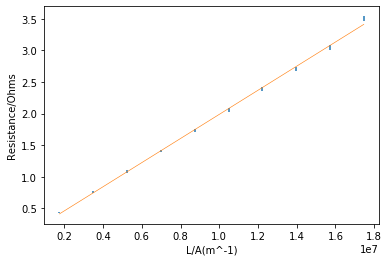

In [32]:
plt.errorbar(LbyA, R, yerr=PD['∆R'], ls='none', barsabove=True)
Y = plt.polyval(plt.polyfit(LbyA, R, 1), LbyA)
plt.xlabel('L/A(m^-1)')
plt.ylabel('Resistance/Ohms')
plt.plot(LbyA, Y, linewidth=0.6)
plt.show()

As seen above, there is a clear correlation, and the error bars for Resistance and quite small. Now, we can calculate the value of $\rho$ by finding the gradient of the line of best fit. 

## Finding the Resistivity

In [35]:
print(plt.polyfit(LbyA, R, 1))

[1.90886454e-07 7.73333333e-02]


The gradient of the graph, or resistivity, is $1.909\times 10^{-7}$. The unit for resistivity is $\Omega m$.  
$\rho=1.909\times 10^{-7}\Omega m$

To find the minimum and maximum gradient, we can add and subtract the uncertainties as required

Min Gradient: $1.921\times10^{-7}\Omega m$  
Max Gradient: $1.966\times10^{-7}\Omega m$  